# User reviews (EDA)

The following notebook shows an exploratory data analysis using the data from the user reviews file (after subjecting such file to some transformations and a cleaning process). 

In [36]:
#Needed_Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from etl_functions import general_information, detect_language, analyze_sentiments

In [2]:
df=pd.read_csv("cleaned_data/reviews_cleaned.csv")

In [3]:
df.head(5)

,item_id,recommend,review,year,user_id
0,1250,True,Simple yet with great replayability. In my opi...,2011.0,76561197970982479
1,251610,True,I know what you think when you see this title ...,2014.0,js41637
2,248820,True,A suitably punishing roguelike platformer. Wi...,NaN,evcentric
3,250320,True,This game... is so fun. The fight sequences ha...,2013.0,doctr
4,211420,True,Git gud,2014.0,maplemage


In [4]:
df["year"] = df["year"].astype("Int64")

In [5]:
df.head(5)

,item_id,recommend,review,year,user_id
0,1250,True,Simple yet with great replayability. In my opi...,2011,76561197970982479
1,251610,True,I know what you think when you see this title ...,2014,js41637
2,248820,True,A suitably punishing roguelike platformer. Wi...,<NA>,evcentric
3,250320,True,This game... is so fun. The fight sequences ha...,2013,doctr
4,211420,True,Git gud,2014,maplemage


In [7]:
general_information(df)

,column,data_type,missing_values,missing_values_percentage
0,item_id,<class 'str'>,0,0.00
1,recommend,<class 'str'>,0,0.00
2,review,<class 'str'>,38,0.00
3,year,<class 'str'>,9915,0.17
4,user_id,<class 'str'>,771,0.01
5,language,<class 'str'>,1146,0.02


In order to the most out of the dataset, what we can do is to apply sentiment analysis to the reviews column. This could provide us with more information about the opinions of the users relative to different products.

In [6]:
#Detecting the language of the different reviews
df["language"]=df["review"].apply(detect_language)

In [8]:
df.head(5)

,item_id,recommend,review,year,user_id,language
0,1250,True,Simple yet with great replayability. In my opi...,2011,76561197970982479,en
1,251610,True,I know what you think when you see this title ...,2014,js41637,en
2,248820,True,A suitably punishing roguelike platformer. Wi...,<NA>,evcentric,en
3,250320,True,This game... is so fun. The fight sequences ha...,2013,doctr,en
4,211420,True,Git gud,2014,maplemage,ca


In [9]:
df["language"].value_counts()

language
en       44859
pt        2155
es        1252
de        1141
so        1003
af         756
th         705
tl         575
cy         450
da         394
no         360
nl         298
ca         258
id         242
it         242
ro         242
pl         241
ko         237
fr         226
ru         211
zh-cn      206
sw         176
et         171
tr         164
hr         137
sl         127
vi         118
sq         106
hu          99
fi          96
sk          75
sv          73
lt          40
lv          38
ja          37
cs          36
bg          20
uk          13
mk           7
zh-tw        6
ar           2
ta           1
Name: count, dtype: int64

We see that, by far, english is the language used to write most of the reviews, so from this point, we will focus our analysis to the rows which the value on the review column is a comment written using this language.

In [10]:
df_en=df[df["language"]=="en"]

In [11]:
df_en.head(5)

,item_id,recommend,review,year,user_id,language
0,1250,True,Simple yet with great replayability. In my opi...,2011,76561197970982479,en
1,251610,True,I know what you think when you see this title ...,2014,js41637,en
2,248820,True,A suitably punishing roguelike platformer. Wi...,<NA>,evcentric,en
3,250320,True,This game... is so fun. The fight sequences ha...,2013,doctr,en
5,249130,True,This game is Marvellous.,2014,Wackky,en


In [12]:
general_information(df_en)

,column,data_type,missing_values,missing_values_percentage
0,item_id,<class 'str'>,0,0.00
1,recommend,<class 'str'>,0,0.00
2,review,<class 'str'>,0,0.00
3,year,<class 'str'>,7818,0.17
4,user_id,<class 'str'>,626,0.01
5,language,<class 'str'>,0,0.00


In [13]:
df_en["review"]=df_en["review"].str.lower()
df_en["review"]=df_en["review"].str.replace('[^A-Za-z0-9\s]+','', regex=True)
df_en["review"]=df_en["review"].str.replace('[^\w\s]','',regex=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_27296\2992933152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en["review"]=df_en["review"].str.lower()
C:\Users\diego\AppData\Local\Temp\ipykernel_27296\2992933152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en["review"]=df_en["review"].str.replace('[^A-Za-z0-9\s]+','', regex=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_27296\2992933152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [14]:
df_en.head(5)

,item_id,recommend,review,year,user_id,language
0,1250,True,simple yet with great replayability in my opin...,2011,76561197970982479,en
1,251610,True,i know what you think when you see this title ...,2014,js41637,en
2,248820,True,a suitably punishing roguelike platformer win...,<NA>,evcentric,en
3,250320,True,this game is so fun the fight sequences have b...,2013,doctr,en
5,249130,True,this game is marvellous,2014,Wackky,en


In [15]:
#Sentiment analysis
df_en=analyze_sentiments(df_en)

c:\Users\diego\OneDrive\Escritorio\SD_MR\etl_functions.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound_score']=df['review'].apply(lambda review: sia.polarity_scores(review)['compound'])
c:\Users\diego\OneDrive\Escritorio\SD_MR\etl_functions.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_analysis']=df['compound_score'].apply(lambda score: 0 if score < 0 else (1 if score == 0 else 2))


In [16]:
df_en.head(5)

,item_id,recommend,review,year,user_id,language,compound_score,sentiment_analysis
0,1250,True,simple yet with great replayability in my opin...,2011,76561197970982479,en,0.8481,2
1,251610,True,i know what you think when you see this title ...,2014,js41637,en,0.9566,2
2,248820,True,a suitably punishing roguelike platformer win...,<NA>,evcentric,en,0.3658,2
3,250320,True,this game is so fun the fight sequences have b...,2013,doctr,en,0.8381,2
5,249130,True,this game is marvellous,2014,Wackky,en,0.0000,1


In [17]:
df_en.drop(columns={"compound_score","language","review"},inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_27296\3165127633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en.drop(columns={"compound_score","language","review"},inplace=True)


In [18]:
df_en.head(5)

,item_id,recommend,year,user_id,sentiment_analysis
0,1250,True,2011,76561197970982479,2
1,251610,True,2014,js41637,2
2,248820,True,<NA>,evcentric,2
3,250320,True,2013,doctr,2
5,249130,True,2014,Wackky,1


Now we can proceed to look for some information in the resulting dataframe.

In [19]:
sentiments_df=df_en["sentiment_analysis"].value_counts().reset_index()

In [20]:
sentiments_df

,sentiment_analysis,count
0,2,31786
1,0,8343
2,1,4730


C:\Users\diego\AppData\Local\Temp\ipykernel_27296\3029717356.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0, 0.5, 'Count')

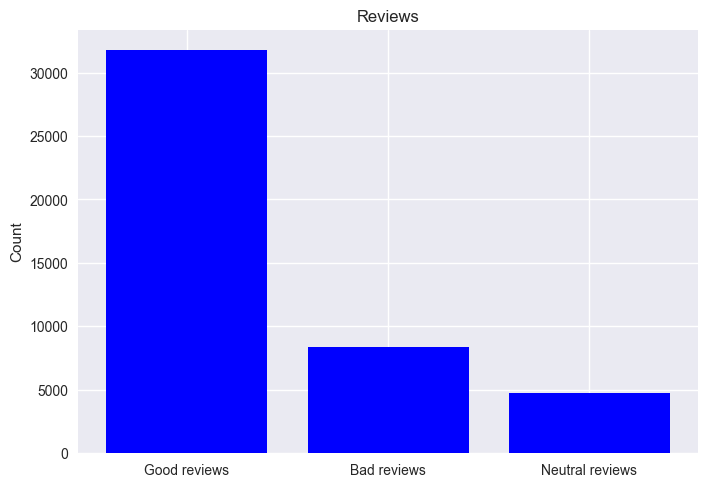

In [31]:
#Reviews count
plt.style.use("seaborn")
plt.bar(["Good reviews","Bad reviews","Neutral reviews"],[sentiments_df.loc[0,"count"],sentiments_df.loc[1,"count"],sentiments_df.loc[2,"count"]],color="blue")
plt.title("Reviews")
plt.ylabel("Count")

We can see that most of the written reviews are positive. 

C:\Users\diego\AppData\Local\Temp\ipykernel_27296\2067964445.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0, 0.5, 'Count')

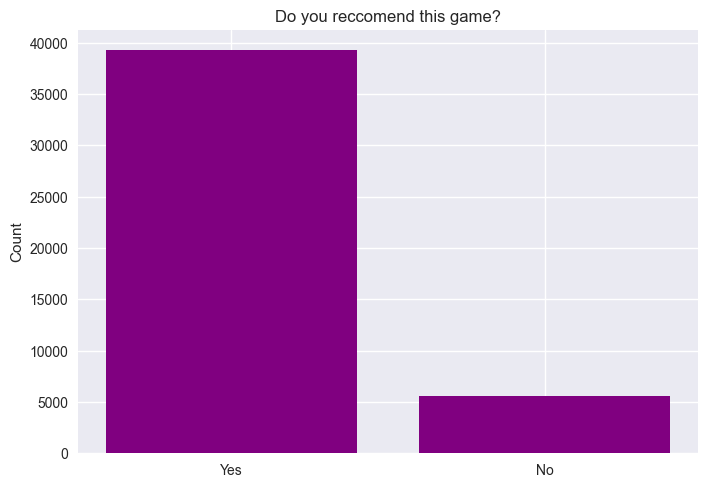

In [30]:
#Recommendation count
plt.style.use("seaborn")
plt.bar(["Yes","No"],[df_en["recommend"].sum(),len(df_en)-df_en["recommend"].sum()],color="purple")
plt.title("Do you reccomend this game?")
plt.ylabel("Count")

As expected, most users give positive recommendations for the products they have tried.

In [40]:
df_wyear=df_en[df_en["year"]!="<NA>"]

In [41]:
df_wyear["year"].value_counts()

year
2014    16413
2015    14235
2013     4973
2012      929
2011      437
2010       54
Name: count, dtype: Int64

We can see that 2014 was the year when more reviews were written.

In [42]:
df_wyear.groupby("year")["sentiment_analysis"].value_counts()

year  sentiment_analysis
2010  2                        41
      0                         7
      1                         6
2011  2                       348
      0                        51
      1                        38
2012  2                       697
      0                       128
      1                       104
2013  2                      3883
      0                       658
      1                       432
2014  2                     11958
      0                      2818
      1                      1637
2015  2                      9609
      0                      2970
      1                      1656
Name: count, dtype: int64

C:\Users\diego\AppData\Local\Temp\ipykernel_27296\1133379801.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


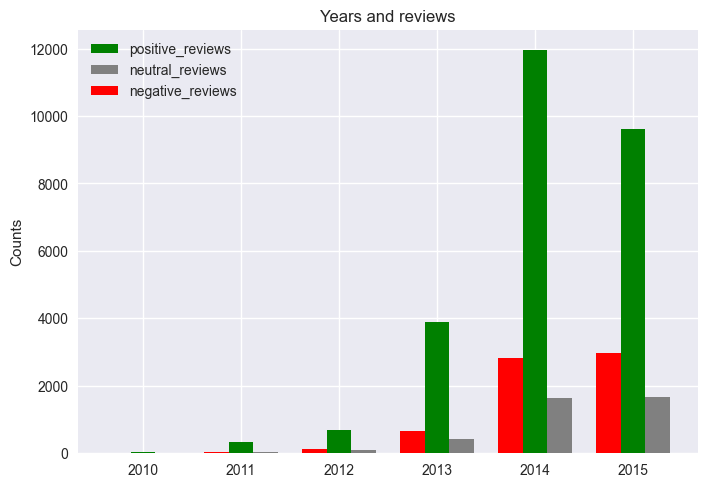

In [43]:
#Years and reviews count
plt.style.use("seaborn")

#years=[2010,2011,2012,2013,2014,2015]
years=np.arange(2010,2016)
width=0.25

positive_reviews=[41,348,697,3883,11958,9609]
negative_reviews=[7,51,128,658,2818,2970]
neutral_reviews=[6,38,104,432,1637,1656]



plt.bar(years,positive_reviews,width=width,label="positive_reviews",color="green")
plt.bar(years+width,neutral_reviews,width=width,label="neutral_reviews",color="grey")
plt.bar(years-width,negative_reviews,width=width,label="negative_reviews",color="red")

plt.title("Years and reviews")
plt.ylabel("Counts")
plt.legend()

And as expected, is also the year with the highest number of positive reviews.